# Постановка задачи
Используя схемы бегущего счета и итерационные методы решить задачу:

$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{1}{u^{2} + 1} \frac{\partial u}{\partial x} = 0, \ ~ 0< x\leq 1 \\
u(x,0) = x\\
u(0,t) = 0
\end{aligned}\\
\right. $

### Исследование характеристик

Зададим область $\Omega$ = \{$(x ,t):(0< x \leq 1),(0\leq t< T)$\} и рассмотрим в ней решение нашей задачи. Заданное уравнение является квазилнейным уравнением переноса, в точке $ (x,t) = (0,0)$ значение функции $u = 0$, то есть начальные и граничные условия согласованы. Также начальное условие $u(x,0) = x$ является монотонно неубывающим, а граничное условие $u(0,t) = 0$ явялется монотонно невозрастающим. Поэтому решение задачи должно быть непрерывным. Найдем характеристики уравнения и убедимся, что пересечений нет.

Уравнение характеристик:

\begin{equation}
\dfrac{dt}{1}=(1+u^2)dx  =\dfrac{du}{0}
\end{equation}

Отсюда после интегрирования получим:

$\left\{\begin{aligned}
u = u(x_0,t_0) = const\\
    t-t_0 = (x-x_0)(1+u^2)
\end{aligned}\\
\right. $

Воспользуемся начальным и граничным условием, чтобы получить семейста характеристик:

$\left\{\begin{aligned}
t_0 = 0, \ ~ u(x_0,0) = x_0, : \qquad t = (x- x_0)(1+x_0^2)\\
x_0 = 0, \ ~ u(0,t_0) = 0, :\qquad \qquad \qquad t = t_0 +x
\end{aligned}\\
\right. $


### Построим характеристики
Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Зададим границы интервалов на графике проекций характеристик и кол-во характеристик

В качестве T возьмем значение, равное 2.

In [2]:
x_start = 0
x_end = 1
t_start = 0
T=1
how_many = 10

Построим графики характеристик для начальных и граничных условий, значения $t_0$ и $x_0$ будут браться равномерно на заданном интервале.

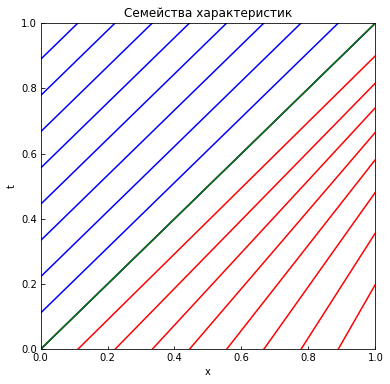

In [3]:
fig, ax =plt.subplots(figsize=(6,6))
plt.ylim(t_start,T)
plt.xlim(x_start, x_end)
plt.title('Семейства характеристик')
plt.xlabel('x')
plt.ylabel('t')
x_array = np.linspace(x_start, x_end, how_many)
t_array = np.linspace(t_start, T, how_many)
for x0 in x_array:
    plt.plot(x_array, (1+x0**2)*(x_array-x0), color = "r")  #  Начальные условия
        
for t0 in t_array:
    plt.plot(x_array, x_array + t0, color = "b")  #  Граничные условия
        
plt.plot(x_array,x_array, color = "g") 
ax.tick_params(axis = 'both', which = 'major', direction ='in')

#### На данном графике:

$\color{blue}{Синим \ цветом}$ изображены характеристики от граничного условия: $ t = t_0 + x \\$

$\color{red}{Красным \ цветом} $ изображены характеристики от начального условия: $ t = (x- x_0)(1+x_0^2)$

$\color{green}{Зелёным \ цветом} $ изображена прямая, разделяющая 2 семейства решений
#### Из графика видно, что характеристики в расчетной области не пересекаются, значит решение непрерывно в этой области.

#  Численное решение

#### Задачу будем решать методом конечных разностей
### Сетка
Введем в области $\Omega=\{(x,t):0 < x \leq 1,~~0<t<T\} $ сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$:
\begin{eqnarray}
\omega_{h, ~ \tau}=\begin{cases}
x_n=n\cdot h, ~~h=\frac{1}{N}, ~~n=\overline{0, N}\\
t_j=j\cdot \tau, ~~\tau =\frac{1}{M}, ~~j=\overline{0, M}
\end{cases}
\end{eqnarray}

На $\omega_{h, ~ \tau}$ будем рассматривать сеточную функцию $y^j_{n}=u(x_n,t_j)$

### Шаблон

Перепишем исходное уравнение, приведя его к дивергентному виду, таким образом мы обеспечим консервативность схемы и избежим ложной сходимости: 

$$\frac{\partial u}{\partial t} + \frac{\partial (atan(u))}{\partial x} = 0\\ $$

Для рассматриваемой задачи будем использовать [Трёхточечный шаблон](http://math.phys.msu.ru/data/374/tema5.pdf). Он безусловно устойчив и аппроксимирует задачу как $ O({h} + {\tau})$.
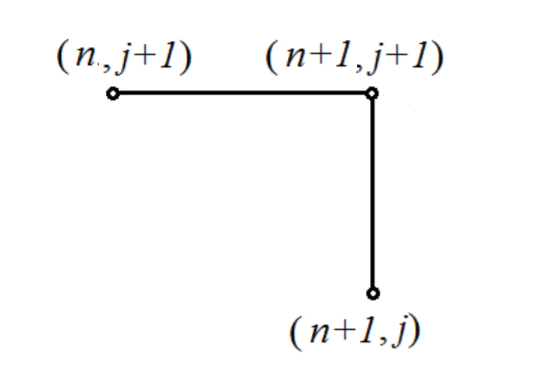

Таким образом, разностная схема задачи имеет вид:

$$\frac{y^{j+1}_{n+1} - y^j_{n+1}}{\tau} + \frac{atan(y^{j+1}_{n+1}) - atan(y^{j+1}_{n})}{h}=0, \qquad n = \overline{0,N-1} \qquad j = \overline{0,M-1}$$

Также начальное и граничное условия:

$$\left\{\begin{aligned} 
y^0_n= x_n \qquad n=\overline{0,N} \\
y^{j}_0 = 0 \qquad j = \overline{0,M}
\end{aligned}\\
\right. $$

Для простоты введем обозначение:
$ F^j_n = atan(y^{j}_{n})\\ $

Тогда разностная схема будет иметь вид:

$$\frac{y^{j+1}_{n+1} - y^j_{n+1}}{\tau} + \frac{F^{j+1}_{n+1} - F^{j+1}_{n}}{h}=0, \qquad n = \overline{0,N-1} \qquad j = \overline{0,M-1}$$

### Cхема бегущего счета

Глядя на шаблон, мы видим, что в данном выражении значения  $y^j_{n+1}$ и $F^{j+1}_{n}$ нам известны по начальным и граничным условиям, для $n=0$ и $j=0$.
Неизвестной функцией является значение $y^{j+1}_{n+1}$, которое также входит в $F^{j+1}_{n+1}$.

Это неявное уравнение относительно $ y^{j+1}_{n+1} $ мы будем решать [итерационным методом Ньютона](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0).

$$ {y^{j+1}_{n+1}}^{(s+1)} = {y^{j+1}_{n+1}}^{(s)} - \frac{ f({y^{j+1}_{n+1}}^{(s)}) }  { f'({y^{j+1}_{n+1}}^{(s)}) } $$

Вычисления будем производить до достижения заданной точности $ \epsilon $: $$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

Функция $f(y^{j+1}_{n+1})$ формально обозначает нашу разностную схему:
$$f(y^{j+1}_{n+1}) = \frac{y^{j+1}_{n+1} - y^j_{n+1}}{\tau} + \frac{F^{j+1}_{n+1} - F^{j+1}_{n}}{h}$$
А её производная равна:

$$f'(y^{j+1}_{n+1}) = \frac{1}{\tau} + \frac{1}{h (1+(y^{j+1}_{n+1})^2)} $$

# Программная реализация

Импортируем необходимые библиотеки:


In [4]:
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Зададим границы области, кол-во узлов сетки $N$ для пространственной координаты и $M$ для временной, а также зададим шаги $h$ и $\tau$

Создадим массивы $x$ и $t$, а также сеточной функции $y$:

In [71]:
N=100
M=50

tau = (T - t_start)/M
h = -(x_start - x_end)/N

x=np.arange(x_start,h+x_end,h)
t = np.arange(t_start,T+tau,tau)
y=np.zeros((M+1,N+1))

Зададим начальные и граничные условия.

In [72]:
y[:,0] = 0
y[0,:] = x[:]

Определим функции, которые будут вычислять значения $f()$ и $F$ в узлах сетки:

In [73]:
def F(j, n):
    return math.atan(y[j][n])
def df(j,n):
    return 1/tau + 1/(h*(1+y[j+1,n+1]**2))
def f(j,n):
    return (-y[j,n+1]+y[j+1,n+1])/tau + (-F(j+1,n) + F(j+1,n+1))/h

Реализуем метод Ньютона. Зададим начальное приближение соседним узлом, выберем малое $\epsilon$

In [74]:
epsilon = 10**(-5)
for j in range(M):
    for n in range(N):
        temp = h                             # > epsilon        
        while temp > epsilon:
            fraction = f(j, n)/df(j, n)
            y[j+1,n+1] = y[j+1,n+1] - fraction
            temp = abs(fraction)            

# Визуализация решения

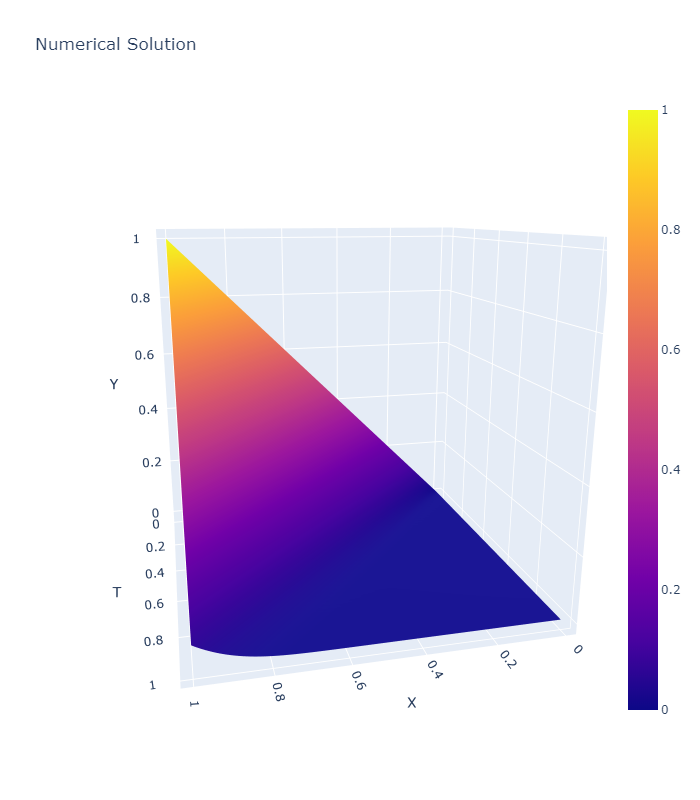


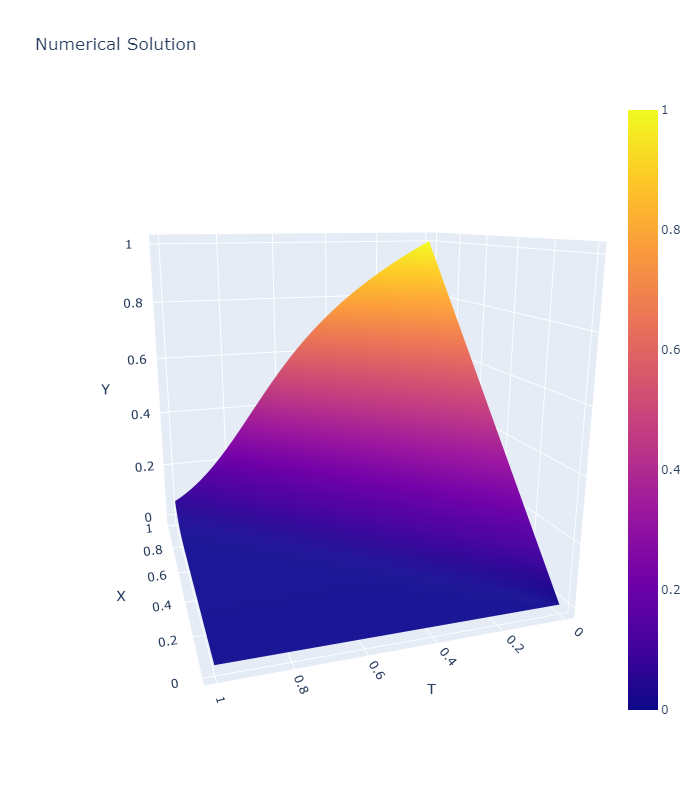

### Построение профилей функции при фиксированных моментах времени

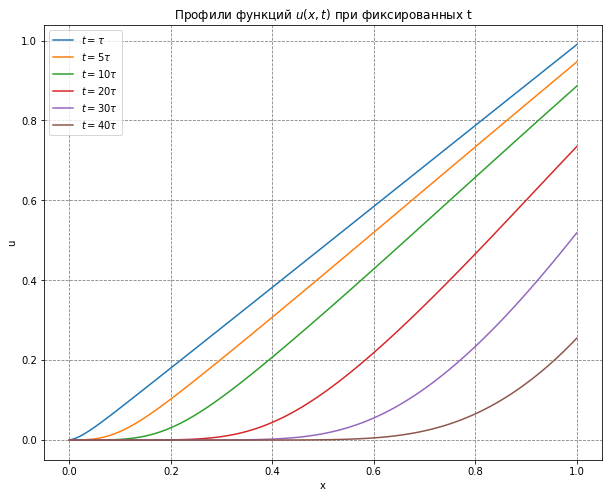

In [78]:
fig,ax=plt.subplots(figsize=(10,8))
x = np.linspace(x_start,x_end,N+1)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профили функций $u(x,t)$ при фиксированных t')
plt.plot(x, y[1,:],label='$t=τ$')
plt.plot(x, y[5,:],label='$t=5τ$')
plt.plot(x, y[10,:],label='$t=10τ$')
plt.plot(x, y[20,:],label='$t=20τ$')
plt.plot(x, y[30,:],label='$t=30τ$')
plt.plot(x, y[40,:],label='$t=40τ$')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')